# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
renda.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [6]:
#Antes de fazer qualquer operação, iremos converter os valores de 'data_ref' para datetime
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

In [7]:
#Como devemos analisar a distribuição de variáveis ao longo do tempo, iremos criar um novo dataframe apenas com as colunas que interessam
renda_qual_tempo = renda[['data_ref', 'posse_de_veiculo', 'posse_de_imovel', 'renda']]
renda_qual_tempo.head()

,data_ref,posse_de_veiculo,posse_de_imovel,renda
0,2015-01-01,False,True,3369.24
1,2015-01-01,True,True,6096.14
2,2015-01-01,True,True,5658.98
3,2015-01-01,True,False,7246.69
4,2015-01-01,False,False,4017.37


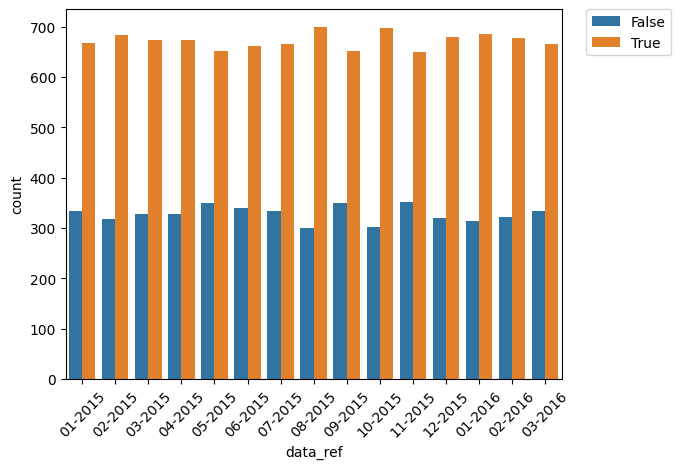

In [15]:
ax = sns.countplot(x = 'data_ref',hue= 'posse_de_imovel' , data= renda_qual_tempo)
tick_labs = renda_qual_tempo['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

tick_labs.tolist()

ticks = ax.set_xticks(list(range(renda_qual_tempo['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

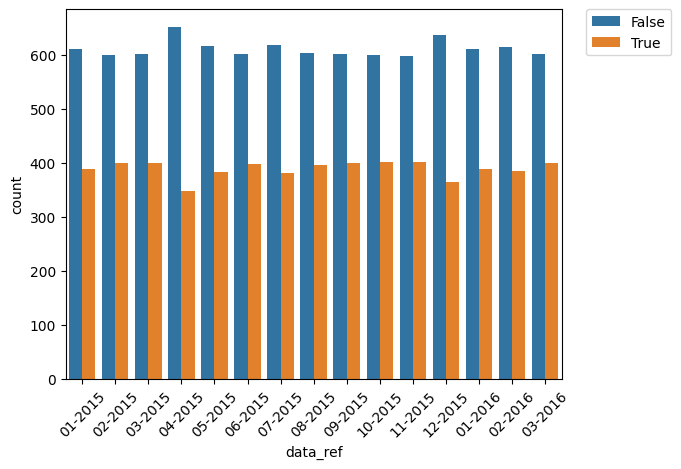

In [16]:
ax = sns.countplot(x = 'data_ref',hue= 'posse_de_veiculo' , data= renda_qual_tempo)
tick_labs = renda_qual_tempo['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

tick_labs.tolist()

ticks = ax.set_xticks(list(range(renda_qual_tempo['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Nos dois gráficos acima, as variavéis não apresentaram grandes variações ao longo do tempo, mostrando que ambas são variavéis estaveis.

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [42]:
#Primeiramente iremos construir um dataframe com apenas as colunas de variaveis quantitativas
renda_num_tempo = renda[['data_ref','idade', 'tempo_emprego', 'qt_pessoas_residencia']]
renda_num_tempo.head()

,data_ref,idade,tempo_emprego,qt_pessoas_residencia
0,2015-01-01,36,3.575342,3.0
1,2015-01-01,42,0.860274,2.0
2,2015-01-01,31,8.065753,4.0
3,2015-01-01,50,1.208219,2.0
4,2015-01-01,52,13.873973,2.0


In [43]:
renda_num_media = renda_num_tempo.groupby('data_ref').mean()


C:\Users\samsun\AppData\Local\Temp\ipykernel_884\1046809053.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(tick_labs, rotation=45)


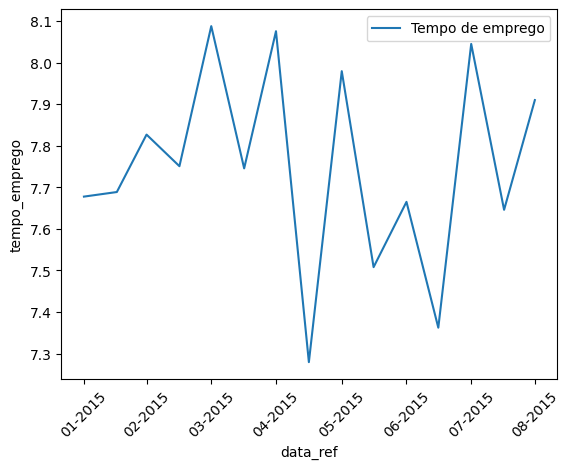

In [44]:
ax = sns.lineplot(x= 'data_ref', y= 'tempo_emprego', data= renda_num_media, label = 'Tempo de emprego')
labels = ax.set_xticklabels(tick_labs, rotation=45)

C:\Users\samsun\AppData\Local\Temp\ipykernel_884\2774300747.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(tick_labs, rotation=45)


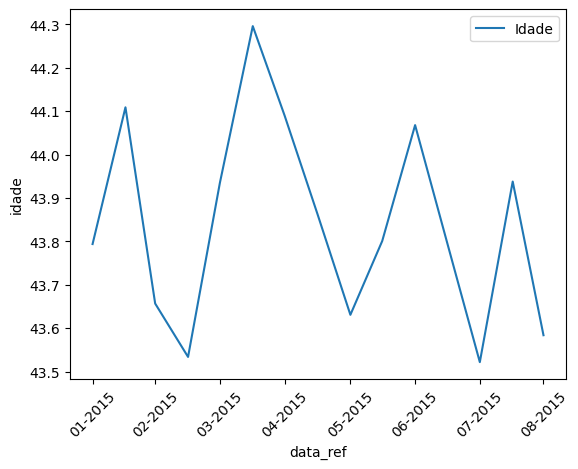

In [45]:
ax = sns.lineplot(x= 'data_ref', y= 'idade', data= renda_num_media, label = 'Idade')
labels = ax.set_xticklabels(tick_labs, rotation=45)

C:\Users\samsun\AppData\Local\Temp\ipykernel_884\448257804.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(tick_labs, rotation=45)


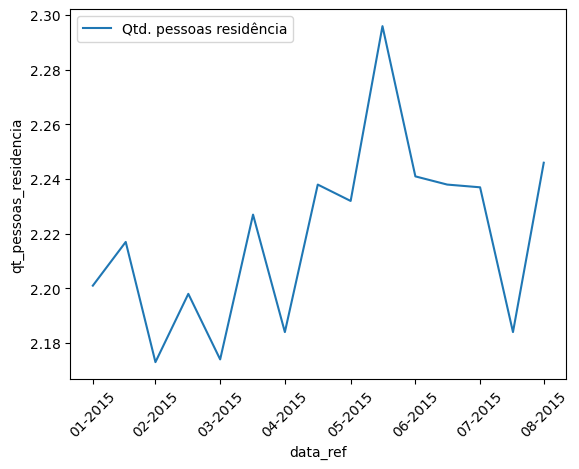

In [46]:
ax = sns.lineplot(x= 'data_ref', y= 'qt_pessoas_residencia', data= renda_num_media, label = 'Qtd. pessoas residência')
labels = ax.set_xticklabels(tick_labs, rotation=45)

Como demostrado pelos 3 gráficos acima, todas as variáveis quantitativas são bastantes instáveis, logo, são pouco adequadas para uma análise ao longo do tempo.